# Лабораторную работы выполнил Виноградов Никита / Студент группы PI-17-2
 Ссылка на gitlab с работой https://gitlab.com/vinogradnick/45kdollars

In [1]:
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
percentage=0.06
base_df=pd.read_csv("./data/train.csv",nrows=int(900000*percentage),low_memory=False)

In [3]:
base_df['date']=base_df['date'].astype(str)
base_df.info()
base_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54000 entries, 0 to 53999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   channelGrouping       54000 non-null  object
 1   date                  54000 non-null  object
 2   device                54000 non-null  object
 3   fullVisitorId         54000 non-null  object
 4   geoNetwork            54000 non-null  object
 5   sessionId             54000 non-null  object
 6   socialEngagementType  54000 non-null  object
 7   totals                54000 non-null  object
 8   trafficSource         54000 non-null  object
 9   visitId               54000 non-null  int64 
 10  visitNumber           54000 non-null  int64 
 11  visitStartTime        54000 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 4.9+ MB


channelGrouping      date  \
0      Organic Search  20160902   
1      Organic Search  20160902   
2      Organic Search  20160902   
3      Organic Search  20160902   
4      Organic Search  20160902   
...               ...       ...   
53995  Organic Search  20170529   
53996  Organic Search  20170529   
53997  Organic Search  20170529   
53998  Organic Search  20170529   
53999  Organic Search  20170529   

                                                  device        fullVisitorId  \
0      {"browser": "Chrome", "browserVersion": "not a...  1131660440785968503   
1      {"browser": "Firefox", "browserVersion": "not ...   377306020877927890   
2      {"browser": "Chrome", "browserVersion": "not a...  3895546263509774583   
3      {"browser": "UC Browser", "browserVersion": "n...  4763447161404445595   
4      {"browser": "Chrome", "browserVersion": "not a...    27294437909732085   
...                                                  ...                  ...   
53995  {"browser": "Chrome", "browserVersion": "not a...  1781542155281384493   
53996  {"browser": "Chrome", "browserVersion": "not a...  9322199284327553263   
53997  {"browser": "Chrome", "browserVersion": "not a...  0394798277903280615   
53998  {"browser": "Chrome", "browserVersion": "not a...  3382372869001940114   
53999  {"browser": "Chrome", "browserVersion": "not a...  5689819789369181257   

                                              geoNetwork  \
0      {"continent": "Asia", "subContinent": "Western...   
1      {"continent": "Oceania", "subContinent": "Aust...   
2      {"continent": "Europe", "subContinent": "South...   
3      {"continent": "Asia", "subContinent": "Southea...   
4      {"continent": "Europe", "subContinent": "North...   
...                                                  ...   
53995  {"continent": "Asia", "subContinent": "Eastern...   
53996  {"continent": "Europe", "subContinent": "Easte...   
53997  {"continent": "Asia", "subContinent": "Western...   
53998  {"continent": "Americas", "subContinent": "Nor...   
53999  {"continent": "Asia", "subContinent": "Souther...   

                            sessionId  socialEngagementType  \
0      1131660440785968503_1472830385  Not Socially Engaged   
1       377306020877927890_1472880147  Not Socially Engaged   
2      3895546263509774583_1472865386  Not Socially Engaged   
3      4763447161404445595_1472881213  Not Socially Engaged   
4        27294437909732085_1472822600  Not Socially Engaged   
...                               ...                   ...   
53995  1781542155281384493_1496042829  Not Socially Engaged   
53996  9322199284327553263_1496081633  Not Socially Engaged   
53997  0394798277903280615_1496048489  Not Socially Engaged   
53998  3382372869001940114_1496085483  Not Socially Engaged   
53999  5689819789369181257_1496127129  Not Socially Engaged   

                                                  totals  \
0      {"visits": "1", "hits": "1", "pageviews": "1",...   
1      {"visits": "1", "hits": "1", "pageviews": "1",...   
2      {"visits": "1", "hits": "1", "pageviews": "1",...   
3      {"visits": "1", "hits": "1", "pageviews": "1",...   
4      {"visits": "1", "hits": "1", "pageviews": "1",...   
...                                                  ...   
53995  {"visits": "1", "hits": "1", "pageviews": "1",...   
53996  {"visits": "1", "hits": "1", "pageviews": "1",...   
53997  {"visits": "1", "hits": "1", "pageviews": "1",...   
53998  {"visits": "1", "hits": "1", "pageviews": "1",...   
53999  {"visits": "1", "hits": "1", "pageviews": "1",...   

                                           trafficSource     visitId  \
0      {"campaign": "(not set)", "source": "google", ...  1472830385   
1      {"campaign": "(not set)", "source": "google", ...  1472880147   
2      {"campaign": "(not set)", "source": "google", ...  1472865386   
3      {"campaign": "(not set)", "source": "google", ...  1472881213   
4      {"campaign": "(not set)", "source": "google", 

In [4]:


# hits=pd.json_normalize(
#     base_df
#     .hits
#     .apply(json.loads)
    
# )
geo_network=pd.json_normalize(
    base_df
    .geoNetwork
    .apply(json.loads)
    
)
devices=pd.json_normalize(
    base_df
    .device
    .apply(json.loads)
    
)
totals=pd.json_normalize(
    base_df
    .totals
    .apply(json.loads)
    
)
trafficSource=pd.json_normalize(
    base_df
    .trafficSource
    .apply(json.loads)
    
)


# Преобразование geoNetwork

In [5]:
geo_network.columns

Index(['continent', 'subContinent', 'country', 'region', 'metro', 'city',
       'cityId', 'networkDomain', 'latitude', 'longitude', 'networkLocation'],
      dtype='object')

In [6]:
geo_network=geo_network.drop(['latitude','longitude','networkLocation','cityId'],axis=1)


## Популярные страны (выбраны 20 по популярности)

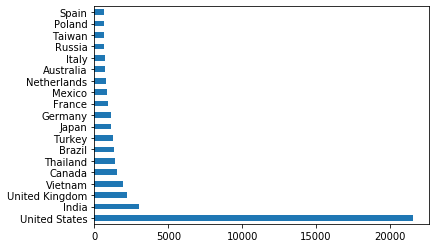

In [7]:

countries= geo_network['country'].value_counts()
# countries.plot.barh()
countries[:19].plot.barh()

## Популярные континенты

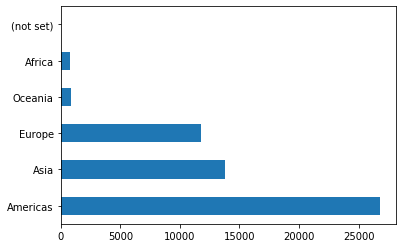

In [8]:
сontinent= geo_network['continent'].value_counts()
сontinent.plot.barh()

# Преобразование Device

In [9]:
devices=devices.drop(['browserVersion',
                      'browserSize',
                      'operatingSystemVersion',
                      'mobileDeviceBranding',
                      'mobileDeviceModel',
                      'mobileInputSelector',
                      'mobileDeviceInfo',
                      'mobileDeviceMarketingName',
                      'language',
                      'screenColors',
                      'screenResolution',
                      'deviceCategory',
                      'flashVersion'
                     ],axis=1)

devices

browser operatingSystem  isMobile
0          Chrome         Windows     False
1         Firefox       Macintosh     False
2          Chrome         Windows     False
3      UC Browser           Linux     False
4          Chrome         Android      True
...           ...             ...       ...
53995      Chrome           Linux     False
53996      Chrome         Windows     False
53997      Chrome         Windows     False
53998      Chrome       Macintosh     False
53999      Chrome         Windows     False

[54000 rows x 3 columns]

In [10]:

popular_browsers= devices['browser'].value_counts()
popular_os=devices['operatingSystem'].value_counts()



## Популярные браузеры

Chrome                      36777
Safari                      11654
Firefox                      2096
Internet Explorer            1083
Edge                          575
Android Webview               401
Safari (in-app)               364
Opera Mini                    323
Opera                         299
UC Browser                    133
YaBrowser                     110
Amazon Silk                    36
Android Browser                35
Coc Coc                        35
Mozilla Compatible Agent       19
BlackBerry                     15
Nintendo Browser               14
MRCHROME                       10
Maxthon                         8
Puffin                          4
Nokia Browser                   3
LYF_LS_4002_12                  1
Mozilla                         1
Lunascape                       1
ADM                             1
IE with Chrome Frame            1
ThumbSniper                     1
Name: browser, dtype: int64


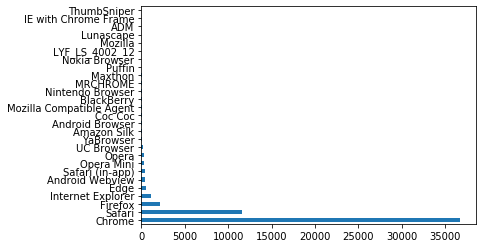

In [11]:
print(popular_browsers)
popular_browsers.plot.barh()

## Популярные операционные системы

Windows          20586
Macintosh        15358
Android           7353
iOS               6605
Linux             2033
Chrome OS         1694
(not set)          232
Windows Phone       81
BlackBerry          17
Samsung             15
Nintendo Wii        13
Xbox                 6
Firefox OS           6
Nintendo WiiU        1
Name: operatingSystem, dtype: int64


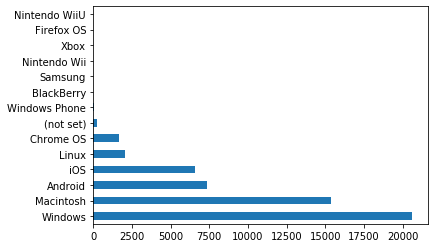

In [12]:
print(popular_os)
popular_os.plot.barh()

# Преобразование trafficSource

In [13]:
trafficSource=trafficSource.drop(['keyword','adwordsClickInfo.criteriaParameters'],axis=1)
trafficSource

campaign  source   medium isTrueDirect referralPath  \
0      (not set)  google  organic          NaN          NaN   
1      (not set)  google  organic          NaN          NaN   
2      (not set)  google  organic          NaN          NaN   
3      (not set)  google  organic          NaN          NaN   
4      (not set)  google  organic         True          NaN   
...          ...     ...      ...          ...          ...   
53995  (not set)  google  organic          NaN          NaN   
53996  (not set)  google  organic          NaN          NaN   
53997  (not set)  google  organic          NaN          NaN   
53998  (not set)  google  organic          NaN          NaN   
53999  (not set)  google  organic          NaN          NaN   

      adwordsClickInfo.page adwordsClickInfo.slot adwordsClickInfo.gclId  \
0                       NaN                   NaN                    NaN   
1                       NaN                   NaN                    NaN   
2                       NaN                   NaN                    NaN   
3                       NaN                   NaN                    NaN   
4                       NaN                   NaN                    NaN   
...                     ...                   ...                    ...   
53995                   NaN                   NaN                    NaN   
53996                   NaN                   NaN                    NaN   
53997                   NaN                   NaN                    NaN   
53998                   NaN                   NaN                    NaN   
53999                   NaN                   NaN                    NaN   

      adwordsClickInfo.adNetworkType adwordsClickInfo.isVideoAd adContent  
0                                NaN                        NaN       NaN  
1                                NaN                        NaN       NaN  
2                                NaN                        NaN       NaN  
3                                NaN                        NaN       NaN  
4                                NaN                        NaN       NaN  
...                              ...                        ...       ...  
53995                            NaN                        NaN       NaN  
53996                            NaN                        NaN       NaN  
53997                            NaN                        NaN       NaN  
53998                            NaN                        NaN       NaN  
53999                            NaN                        NaN       NaN  

[54000 rows x 11 columns]

In [14]:
traffic_counts=trafficSource['source'].value_counts()
traffic_counts

google                        23953
youtube.com                   12904
(direct)                       8391
mall.googleplex.com            4179
analytics.google.com            922
                              ...  
github.com                        1
nordic.businessinsider.com        1
l.messenger.com                   1
drawnames.com                     1
google.fr                         1
Name: source, Length: 127, dtype: int64

# Работа с подсчетами [Totals]

In [15]:

totals=totals.fillna(0)

totals['transactionRevenue']=totals['transactionRevenue'].astype(float)
totals['transactionRevenue'].value_counts()


0.000000e+00    53300
3.359000e+07       22
1.699000e+07       14
1.899000e+07       13
1.359000e+07       13
                ...  
4.466000e+07        1
3.072000e+07        1
1.698580e+09        1
1.229600e+08        1
7.692900e+08        1
Name: transactionRevenue, Length: 518, dtype: int64

## Средний доход

In [16]:

totals['transactionRevenue'].mean()

1664625.9259259258

## Максимальный доход

In [17]:
totals['transactionRevenue'].max()

5498000000.0

## Популярный доход который больше 0


In [18]:
totals[totals['transactionRevenue']>0]['transactionRevenue'].mode()

0    33590000.0
dtype: float64

# Работаем с главным датаестом

In [19]:
base_df=base_df.drop(['device','geoNetwork','totals','trafficSource','socialEngagementType'],axis=1)





In [20]:
base_df['date']=base_df['date'].apply(lambda item:pd.datetime(int(item[:4]),int(item[4:6]), int(item[6:8])))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [21]:
base_df

channelGrouping       date        fullVisitorId  \
0      Organic Search 2016-09-02  1131660440785968503   
1      Organic Search 2016-09-02   377306020877927890   
2      Organic Search 2016-09-02  3895546263509774583   
3      Organic Search 2016-09-02  4763447161404445595   
4      Organic Search 2016-09-02    27294437909732085   
...               ...        ...                  ...   
53995  Organic Search 2017-05-29  1781542155281384493   
53996  Organic Search 2017-05-29  9322199284327553263   
53997  Organic Search 2017-05-29  0394798277903280615   
53998  Organic Search 2017-05-29  3382372869001940114   
53999  Organic Search 2017-05-29  5689819789369181257   

                            sessionId     visitId  visitNumber  visitStartTime  
0      1131660440785968503_1472830385  1472830385            1      1472830385  
1       377306020877927890_1472880147  1472880147            1      1472880147  
2      3895546263509774583_1472865386  1472865386            1      1472865386  
3      4763447161404445595_1472881213  1472881213            1      1472881213  
4        27294437909732085_1472822600  1472822600            2      1472822600  
...                               ...         ...          ...             ...  
53995  1781542155281384493_1496042829  1496042829            1      1496042829  
53996  9322199284327553263_1496081633  1496081633            1      1496081633  
53997  0394798277903280615_1496048489  1496048489            1      1496048489  
53998  3382372869001940114_1496085483  1496085483            1      1496085483  
53999  5689819789369181257_1496127129  1496127129            1      1496127129  

[54000 rows x 7 columns]

In [22]:
base_df['fullVisitorId'].value_counts()

1957458976293878100    17
3269834865385146569    14
0824839726118485274    13
0232377434237234751    12
6254908847172458133    11
                       ..
377494611323044153      1
0759775686397221246     1
9581658877686419780     1
68437640696494161       1
2852773274959323655     1
Name: fullVisitorId, Length: 49015, dtype: int64

 # Популярность поиска элемента в магазине

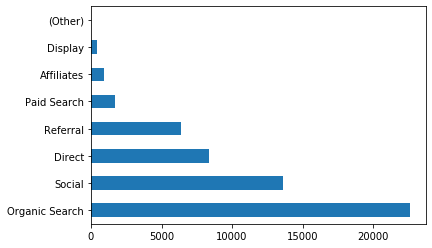

In [23]:
channelPopular=base_df['channelGrouping'].value_counts()
channelPopular.plot.barh()

In [24]:
base_df=base_df.join(geo_network)
base_df=base_df.join(devices)
base_df=base_df.join(totals)
base_df=base_df.join(trafficSource)


In [25]:
base_df=base_df.fillna(0)

In [26]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54000 entries, 0 to 53999
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   channelGrouping                 54000 non-null  object        
 1   date                            54000 non-null  datetime64[ns]
 2   fullVisitorId                   54000 non-null  object        
 3   sessionId                       54000 non-null  object        
 4   visitId                         54000 non-null  int64         
 5   visitNumber                     54000 non-null  int64         
 6   visitStartTime                  54000 non-null  int64         
 7   continent                       54000 non-null  object        
 8   subContinent                    54000 non-null  object        
 9   country                         54000 non-null  object        
 10  region                          54000 non-null  object        
 11  me

In [27]:
base_df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'continent', 'subContinent', 'country',
       'region', 'metro', 'city', 'networkDomain', 'browser',
       'operatingSystem', 'isMobile', 'visits', 'hits', 'pageviews', 'bounces',
       'newVisits', 'transactionRevenue', 'campaign', 'source', 'medium',
       'isTrueDirect', 'referralPath', 'adwordsClickInfo.page',
       'adwordsClickInfo.slot', 'adwordsClickInfo.gclId',
       'adwordsClickInfo.adNetworkType', 'adwordsClickInfo.isVideoAd',
       'adContent'],
      dtype='object')

In [28]:

base_df['adwordsClickInfo.isVideoAd'].value_counts()

0    54000
Name: adwordsClickInfo.isVideoAd, dtype: int64

In [29]:
transactionRevenue =base_df['transactionRevenue'].describe()

In [30]:
positive=base_df[base_df['transactionRevenue']>0]

In [31]:
def barh(df,column,split=10,chartNeed=False):
    dat= positive[column].value_counts()[:split]
    if chartNeed:
        return dat.plot.barh()
    return dat
    

## Расчетные показатели

### Вычисление дня недели
День недели может помочь определить в какой день наиболее удачный для покупок и приносит больше дохода

In [32]:
base_df['week']=base_df['date'].dt.dayofweek

### Конверсия
Конверсия — это коэффициент, показывающий соотношение числа покупателей к числу посетителей сайта


In [33]:

def conversion_calculate(df):
    customers=df[(df['transactionRevenue']>0)]['transactionRevenue'].count()
    visitors=df[(df['transactionRevenue']==0)]['transactionRevenue'].count()
    conv=customers/visitors
    df['conversion']=conv
    return df

base_df=base_df.groupby(['source']).apply(conversion_calculate)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in long_scalars
  after removing the cwd from sys.path.


### Показатель возврата
Показывает сколько поситителей вернулась на основе источника рекламы, и получается каждый клиент который возврашается чаще делает покупки

In [34]:
def customers_back(df):
    new=len(df[df['newVisits']==0])
    if new==0:
        df['returnRate']=0
    else:
        val= new /len(df)
        df['returnRate']=val
   
    return df


In [35]:
base_df= base_df.groupby(['source']).apply(customers_back)

### Показатель отказов 
Показатель отказов (англ. bounce rate) - термин в веб-аналитике, обозначающий процентное соотношение количества посетителей, покинувших сайт прямо со страницы входа или просмотревших не более одной страницы сайта



In [36]:
def bounce_rate(df):
    new=len(df[df['bounces']==1])
    if new==0:
        df['bounceRate']=0
    else:
        val= new /len(df)
        df['bounceRate']=val
   
    return df


In [37]:
base_df['bounces']=base_df['bounces'].astype(int)

In [38]:
base_df= base_df.groupby(['source']).apply(bounce_rate)

In [39]:
base_df

channelGrouping       date        fullVisitorId  \
0      Organic Search 2016-09-02  1131660440785968503   
1      Organic Search 2016-09-02   377306020877927890   
2      Organic Search 2016-09-02  3895546263509774583   
3      Organic Search 2016-09-02  4763447161404445595   
4      Organic Search 2016-09-02    27294437909732085   
...               ...        ...                  ...   
53995  Organic Search 2017-05-29  1781542155281384493   
53996  Organic Search 2017-05-29  9322199284327553263   
53997  Organic Search 2017-05-29  0394798277903280615   
53998  Organic Search 2017-05-29  3382372869001940114   
53999  Organic Search 2017-05-29  5689819789369181257   

                            sessionId     visitId  visitNumber  \
0      1131660440785968503_1472830385  1472830385            1   
1       377306020877927890_1472880147  1472880147            1   
2      3895546263509774583_1472865386  1472865386            1   
3      4763447161404445595_1472881213  1472881213            1   
4        27294437909732085_1472822600  1472822600            2   
...                               ...         ...          ...   
53995  1781542155281384493_1496042829  1496042829            1   
53996  9322199284327553263_1496081633  1496081633            1   
53997  0394798277903280615_1496048489  1496048489            1   
53998  3382372869001940114_1496085483  1496085483            1   
53999  5689819789369181257_1496127129  1496127129            1   

       visitStartTime continent      subContinent         country  ...  \
0          1472830385      Asia      Western Asia          Turkey  ...   
1          1472880147   Oceania       Australasia       Australia  ...   
2          1472865386    Europe   Southern Europe           Spain  ...   
3          1472881213      Asia    Southeast Asia       Indonesia  ...   
4          1472822600    Europe   Northern Europe  United Kingdom  ...   
...               ...       ...               ...             ...  ...   
53995      1496042829      Asia      Eastern Asia          Taiwan  ...   
53996      1496081633    Europe    Eastern Europe        Bulgaria  ...   
53997      1496048489      Asia      Western Asia          Turkey  ...   
53998      1496085483  Americas  Northern America   United States  ...   
53999      1496127129      Asia     Southern Asia           India  ...   

      adwordsClickInfo.page adwordsClickInfo.slot adwordsClickInfo.gclId  \
0                         0                     0                      0   
1                         0                     0                      0   
2                         0                     0                      0   
3                         0                     0                      0   
4                         0                     0                      0   
...                     ...                   ...                    ...   
53995                     0                     0                      0   
53996                     0                     0                      0   
53997                     0                     0                      0   
53998                     0                     0                      0   
53999                     0                     0                      0   

      adwordsClickInfo.adNetworkType adwordsClickInfo.isVideoAd adContent  \
0                                  0                          0         0   
1                                  0                          0         0   
2                                  0                          0         0   
3                                  0                          0         0   
4                                  0                          0         0   
...                              ...                        ...       ...   
53995                              0                          0         0   
53996                              0                          0         0   
53997                            

###  Purchase Frequency (частота покупок)


In [40]:
 def frequency(df):
    ds=df.groupby([df['date'].dt.month])['date']
    df['frequency']=ds.nunique().map(lambda x:x/30).sum()
    return df


In [41]:
base_df= base_df.groupby(['source']).apply(frequency)


In [42]:
train=base_df[['channelGrouping',
       'visitNumber',  'continent',  'country',
     'networkDomain', 'browser',
       'operatingSystem', 'isMobile', 'visits', 'hits', 'pageviews', 'bounces',
       'newVisits',  'source',
       'isTrueDirect', 
       'week', 'conversion', 'returnRate', 'bounceRate',
       'frequency']]


In [43]:
train

channelGrouping  visitNumber continent         country  \
0      Organic Search            1      Asia          Turkey   
1      Organic Search            1   Oceania       Australia   
2      Organic Search            1    Europe           Spain   
3      Organic Search            1      Asia       Indonesia   
4      Organic Search            2    Europe  United Kingdom   
...               ...          ...       ...             ...   
53995  Organic Search            1      Asia          Taiwan   
53996  Organic Search            1    Europe        Bulgaria   
53997  Organic Search            1      Asia          Turkey   
53998  Organic Search            1  Americas   United States   
53999  Organic Search            1      Asia           India   

            networkDomain     browser operatingSystem  isMobile visits hits  \
0            ttnet.com.tr      Chrome         Windows     False      1    1   
1             dodo.net.au     Firefox       Macintosh     False      1    1   
2         unknown.unknown      Chrome         Windows     False      1    1   
3         unknown.unknown  UC Browser           Linux     False      1    1   
4         unknown.unknown      Chrome         Android      True      1    1   
...                   ...         ...             ...       ...    ...  ...   
53995           hinet.net      Chrome           Linux     False      1    1   
53996         fibermax.bg      Chrome         Windows     False      1    1   
53997        ttnet.com.tr      Chrome         Windows     False      1    1   
53998           (not set)      Chrome       Macintosh     False      1    1   
53999  airtelbroadband.in      Chrome         Windows     False      1    1   

      pageviews  bounces newVisits  source isTrueDirect  week  conversion  \
0             1        1         1  google            0     4    0.008887   
1             1        1         1  google            0     4    0.008887   
2             1        1         1  google            0     4    0.008887   
3             1        1         1  google            0     4    0.008887   
4             1        1         0  google         True     4    0.008887   
...         ...      ...       ...     ...          ...   ...         ...   
53995         1        1         1  google            0     0    0.008887   
53996         1        1         1  google            0     0    0.008887   
53997         1        1         1  google            0     0    0.008887   
53998         1        1         1  google            0     0    0.008887   
53999         1        1         1  google            0     0    0.008887   

       returnRate  bounceRate  frequency  
0        0.216758    0.482821   0.733333  
1        0.216758    0.482821   0.733333  
2        0.216758    0.482821   0.733333  
3        0.216758    0.482821   0.733333  
4        0.216758    0.482821   0.733333  
...           ...         ...        ...  
53995    0.216758    0.482821   0.733333  
53996    0.216758    0.482821   0.733333  
53997    0.216758    0.482821   0.733333  
53998    0.216758    0.482821   0.733333  
53999    0.216758    0.482821   0.733333  

[54000 rows x 20 columns]

In [44]:
train['pageviews']=train['pageviews'].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
train=train.replace([np.inf, -np.inf], 0)
export_y=np.log(base_df['transactionRevenue']+1)

## Выполняем преобразование категориальных данных


In [46]:
export=pd.get_dummies(train,columns=['channelGrouping','country','continent','networkDomain','source','browser','operatingSystem'])

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(export,export_y , random_state=0,test_size=0.33)


## Линейная регрессия

In [49]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
lr.score(X_test, y_test)

-1.2278573133586666e+17

## SVR модель

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

## BGM модель

In [51]:
from catboost import CatBoostRegressor


gbm=CatBoostRegressor(iterations=300,
                        learning_rate=0.01,
                        depth=10)


gbm.fit(X_train, y_train)




0:	learn: 2.0525660	total: 274ms	remaining: 1m 21s
1:	learn: 2.0458747	total: 542ms	remaining: 1m 20s
2:	learn: 2.0394786	total: 629ms	remaining: 1m 2s
3:	learn: 2.0333738	total: 922ms	remaining: 1m 8s
4:	learn: 2.0272644	total: 1.16s	remaining: 1m 8s
5:	learn: 2.0219364	total: 1.41s	remaining: 1m 9s
6:	learn: 2.0158565	total: 1.65s	remaining: 1m 9s
7:	learn: 2.0099650	total: 1.96s	remaining: 1m 11s
8:	learn: 2.0042915	total: 2.17s	remaining: 1m 10s
9:	learn: 1.9987168	total: 2.37s	remaining: 1m 8s
10:	learn: 1.9929957	total: 2.63s	remaining: 1m 9s
11:	learn: 1.9874715	total: 2.9s	remaining: 1m 9s
12:	learn: 1.9819254	total: 3.11s	remaining: 1m 8s
13:	learn: 1.9770475	total: 3.32s	remaining: 1m 7s
14:	learn: 1.9716044	total: 3.53s	remaining: 1m 7s
15:	learn: 1.9661042	total: 3.74s	remaining: 1m 6s
16:	learn: 1.9610019	total: 3.95s	remaining: 1m 5s
17:	learn: 1.9559010	total: 4.15s	remaining: 1m 5s
18:	learn: 1.9508719	total: 4.36s	remaining: 1m 4s
19:	learn: 1.9456255	total: 4.58s	rema

In [52]:
gbm.score(X_test, y_test)

0.3005124097851479

# Random Forest Regressor

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


forest = RandomForestRegressor(max_depth=2, random_state=0)
forest.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [54]:
forest.score(X_test, y_test)

0.24255988395973482

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# scores = cross_val_score(reg,export, base_df['transactionRevenue'], cv=5)
kf = KFold(n_splits=5)



# Cross Validation RandomForest

In [ ]:
scores = cross_val_score(forest, export, base_df['transactionRevenue'], cv=kf)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Cross Validation GradientBoostingModel

In [ ]:
scores = cross_val_score(gbm, export, base_df['transactionRevenue'], cv=kf)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Cross Validation LinearRegression

In [ ]:
scores = cross_val_score(lr, export, base_df['transactionRevenue'], cv=kf)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Cross Validation Svr

In [ ]:
scores = cross_val_score(svr, export, base_df['transactionRevenue'], cv=kf)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))